In [1]:
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
from PIL import Image

img = X_train[0]
newimage = Image.new('RGB', (len(img[0]), len(img)))  # type, size
newimage.putdata([tuple(p) for row in img for p in row])
newimage.save("test_out.png")

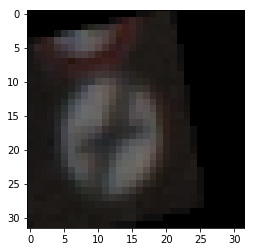

34799
34799
(34799, 32, 32, 3)


In [2]:
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
import random

sometimes = lambda aug: iaa.Sometimes(0.5, aug)

seq = iaa.Sequential(
    [
        sometimes(iaa.Crop(px=(0, 6))), # crop images from each side by 0 to 6px (randomly chosen)
        sometimes(iaa.GaussianBlur(0, 2.0)), # blur images with a sigma between 0 and 3.0
        sometimes(iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.01*255), per_channel=0.5)), # add gaussian noise to images
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-15, 15), # rotate by -15 to +15 degrees
            shear=(-16, 16) # shear by -16 to +16 degrees
        ))
    ]
)

# Affine: Shear

# 'images' should be either a 4D numpy array of shape (N, height, width, channels)
# or a list of 3D numpy arrays, each having shape (height, width, channels).
# Grayscale images must have shape (height, width, 1) each.
# All images must have numpy's dtype uint8. Values are expected to be in
# range 0-255.
images_aug = seq.augment_images(X_train)


r_test = random.randint(0,len(images_aug))
plt.imshow(images_aug[0])
plt.show()
print(len(X_train))
print(len(images_aug))
print(images_aug.shape)

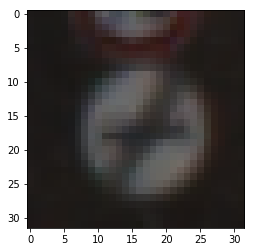

In [3]:
plt.imshow(X_train[0])
plt.show()